In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob

In [2]:
im = np.load('../../demos/perms_unique/ims_0000.npy')

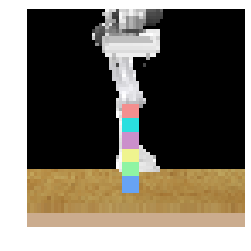

In [3]:
plt.imshow(im)
plt.axis('off')
plt.show()

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

matplotlib.rcParams.update(nice_fonts)

In [5]:
# Load Sinkhorn data
flist = sorted(glob.glob('./precision_s*'))
pre_sink = []
for f in flist:
    pre_sink.append(np.genfromtxt(f))

In [6]:
# Demo numbers
demos = np.arange(1,720,50,dtype='int')

In [7]:
# Load TCN data
flist = sorted(glob.glob('./precision_t*'))
pre_tcn = []
for f in flist:
    pre_tcn.append(np.genfromtxt(f))

In [8]:
# Perfect baseline (no generalisation)
from itertools import permutations
perms = np.array(list(permutations(np.arange(6),6)))

baseline_pre = []
for d in demos:
    perms_copy = np.copy(perms)
    perms_shuffled = np.copy(perms_copy[d:,:])
    np.random.shuffle(perms_shuffled)
    perms_copy[d:,:] = perms_shuffled

    pre_list = []
    for k in range(perms.shape[0]):
        
        pre = np.sum(perms[k,:]==perms_copy[k,:])/perms[k,:].shape[0]
        pre_list.append(pre)

    baseline_pre.append(pre_list)

In [9]:
hists_p_sink = []
for p in pre_sink:
    h,_ = np.histogram(p,np.linspace(0,1,5))
    hists_p_sink.append(h)

hists_p_tcn = []
for p in pre_tcn:
    h,_ = np.histogram(p,np.linspace(0,1,5))
    hists_p_tcn.append(h)
    
pmean_sink = np.array([np.mean(p) for p in pre_sink])
pstd_sink = np.array([np.std(p) for p in pre_sink])

pmean_tcn = np.array([np.mean(p) for p in pre_tcn])
pstd_tcn = np.array([np.std(p) for p in pre_tcn])

bpmean = np.array([np.mean(p) for p in baseline_pre])
bpstd = np.array([np.std(p) for p in baseline_pre])

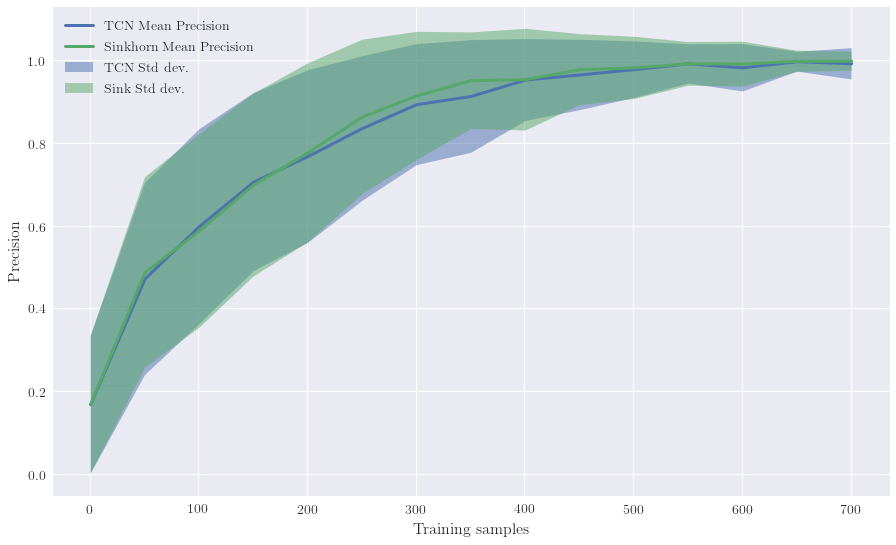

In [22]:
plt.figure(figsize=(15,9))
plt.plot(demos[0:len(pmean_tcn)],pmean_tcn,linewidth=3,label='TCN Mean Precision')
plt.fill_between(demos[0:len(pmean_tcn)],pmean_tcn-pstd_tcn,pmean_tcn+pstd_tcn,alpha=0.5,label='TCN Std dev.')

plt.plot(demos[0:len(pmean_sink)],pmean_sink,linewidth=3,label='Sinkhorn Mean Precision')
plt.fill_between(demos[0:len(pmean_sink)],pmean_sink-pstd_sink,pmean_sink+pstd_sink,alpha=0.5,label='Sink Std dev.')

plt.xlabel('Training samples')
plt.ylabel('Precision')
plt.legend()
plt.show()

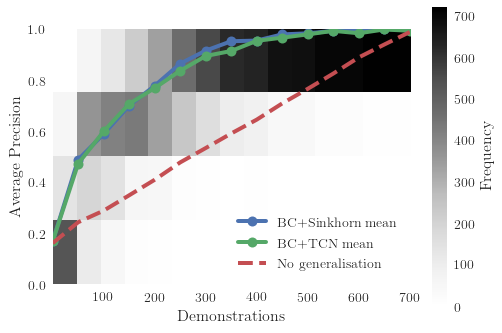

In [23]:
# Compare on Sinkhorn hists
plt.imshow(np.vstack(hists_p_sink).T,extent=(demos[0],demos[-1],0,1),aspect=500,origin='lower',vmin=0,vmax=720,interpolation='None')
plt.plot(demos[0:len(pmean_sink)],pmean_sink,'-o',linewidth=4,label='BC+Sinkhorn mean',markersize=10)
plt.plot(demos[0:len(pmean_tcn)],pmean_tcn,'-o',linewidth=4,label='BC+TCN mean',markersize=10)
plt.plot(demos,bpmean,'--',linewidth=4,label='No generalisation')
plt.colorbar(label='Frequency')
plt.legend(loc='lower right')
plt.grid()
plt.ylabel('Average Precision')
plt.xlabel('Demonstrations')
plt.savefig('Precision_unique.pdf')
plt.show()